# The big Question

use machine learning to process and transform Iris data to create a model. This model must predict the type of iris given specific features with 90% or greater accuracy.

## A little dive into the data

- 50 samples of 3 different species of iris (150 samples total)
- species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica
- Measurements: sepal length, sepal width, petal length, petal width
- supervised learning problem
- **Classification** problem since target is categorical
- 150 **instances**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **target** variable is the iris species

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Train, val, Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(96, 4)
(24, 4)
(30, 4)
(96,)
(24,)
(30,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.fit_transform(X_val)
X_train_1_prep = scaler.fit_transform(X_train_1)

## create models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 

In [16]:
models = [('log_reg', LogisticRegression()), ('tree_clf', DecisionTreeClassifier()),
         ('forest_clf', RandomForestClassifier()), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB()), ('knn',KNeighborsClassifier()),
         ('extra_clf' ,ExtraTreesClassifier())]
results= []
names= []
evale= []
cme= []
for name, model in models:
    model.fit(X_train_prep, y_train)
    joblib.dump(model, name +'.pkl')
    accuracy= model.score(X_train_prep, y_train)*100
    val_accuracy= model.score(X_val_prep, y_val)*100
    cv= cross_val_score(model, X_train_prep, y_train,
                            scoring='accuracy', cv=10)
    results.append([accuracy, cv])
    names.append(name)
    eval= "%s:\t%f\t%f\t%f (%f)" % (name, accuracy, val_accuracy, cv.mean()*100, cv.std()*100)
    evale.append(eval)
    y_pred = model.predict(X_val_prep)
    c_matrix = confusion_matrix(y_val, y_pred)
    cme.append([name, c_matrix])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
print("""\t\t training\t validating
NAME\t\t ACCURACY\tACCURACY\t CV_MEAN (CV_STD)""")
print('='*75)
for eval in evale:
    print(eval)
    print('='*75)

		 training	 validating
NAME		 ACCURACY	ACCURACY	 CV_MEAN (CV_STD)
log_reg:	89.583333	66.666667	88.404040 (9.954165)
tree_clf:	100.000000	91.666667	91.535354 (10.602674)
forest_clf:	98.958333	87.500000	93.555556 (8.517230)
svm_clf:	98.958333	91.666667	95.979798 (6.666942)
sgd_clf:	76.041667	66.666667	80.252525 (13.769366)
nb_clf:	93.750000	83.333333	93.555556 (11.042007)
knn:	97.916667	87.500000	95.070707 (6.676577)
extra_clf:	100.000000	91.666667	94.757576 (7.246368)


In [18]:
for cm in cme:
    print(cm)
    print('='*75)

['log_reg', array([[7, 1, 0],
       [0, 4, 7],
       [0, 0, 5]], dtype=int64)]
['tree_clf', array([[8, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)]
['forest_clf', array([[8, 0, 0],
       [0, 8, 3],
       [0, 0, 5]], dtype=int64)]
['svm_clf', array([[8, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)]
['sgd_clf', array([[7, 1, 0],
       [4, 4, 3],
       [0, 0, 5]], dtype=int64)]
['nb_clf', array([[8, 0, 0],
       [0, 7, 4],
       [0, 0, 5]], dtype=int64)]
['knn', array([[8, 0, 0],
       [0, 8, 3],
       [0, 0, 5]], dtype=int64)]
['extra_clf', array([[8, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)]


#### from this the SVM classifier did best

In [19]:
svm_clf = joblib.load('svm_clf.pkl')
svm_clf.fit(X_train_prep, y_train)
y_pred = svm_clf.predict(X_val_prep)
accuracy= metrics.accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

91.66666666666666
[[8 0 0]
 [0 9 2]
 [0 0 5]]


In [20]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 1 0 0 0 2 1 2 2 2 1 1 1 1 1 0 2 0 1 0 1 1 0 0]
Pred: [1 1 0 0 0 2 2 2 2 2 1 2 1 1 1 0 2 0 1 0 1 1 0 0]


the only error this model is making is prediction 2 instead of 1

### our model is therefore SVM

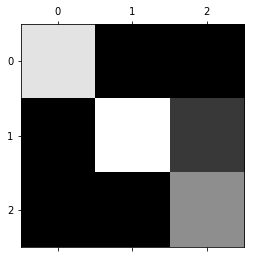

In [21]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(c_matrix, cmap=plt.cm.gray)

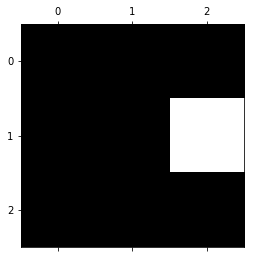

In [22]:
#focusing on only the errors
row_sums = c_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = c_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the RandomForestClassifier generalizes well and it is only making error on predicting 2 confusing it to be 1

In [23]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.71      1.00      0.83         5

   micro avg       0.92      0.92      0.92        24
   macro avg       0.90      0.94      0.91        24
weighted avg       0.94      0.92      0.92        24



Text(0, 0.5, 'Frequency')

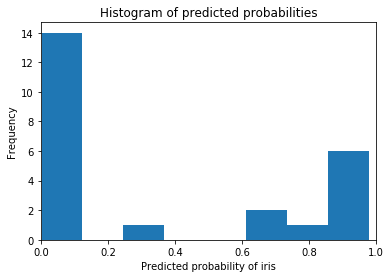

In [24]:
y_pred_prob = svm_clf.predict_proba(X_val_prep)[:, 1]
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of iris')
plt.ylabel('Frequency')

In [25]:
y_pred_prob

array([0.88675568, 0.72538911, 0.02419972, 0.02424521, 0.03252855,
       0.02036362, 0.06229317, 0.00342159, 0.00181934, 0.00639021,
       0.86493959, 0.03308396, 0.64538833, 0.95867828, 0.88455963,
       0.34465916, 0.01450797, 0.03931018, 0.97904023, 0.02591084,
       0.87603171, 0.75124835, 0.032082  , 0.01983715])

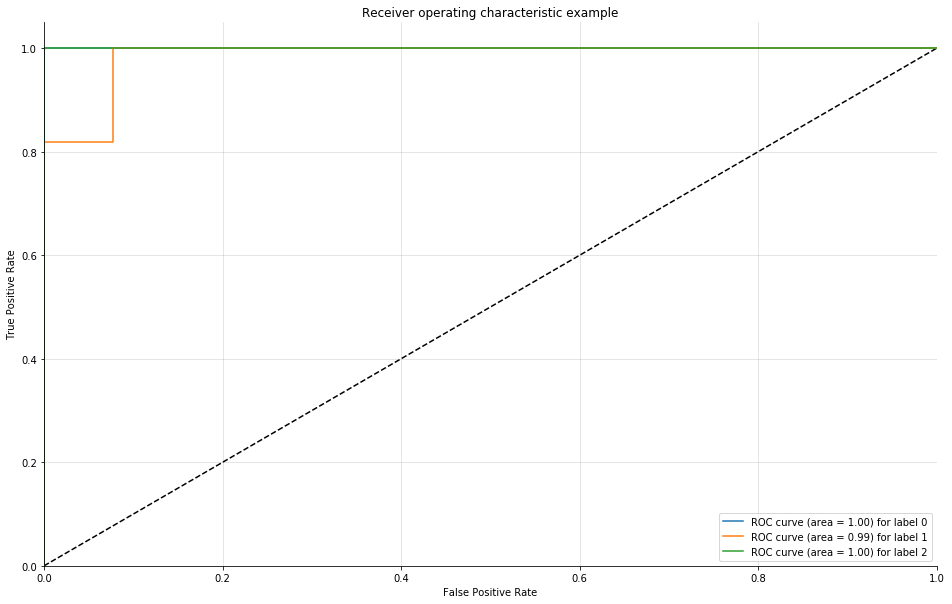

In [26]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
def plot_multiclass_roc(clf, X_val, y_val, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_val)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_val_dummies = pd.get_dummies(y_val, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(svm_clf, X_val_prep, y_val, n_classes=3, figsize=(16, 10))

## Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
                     'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                       scoring='precision_macro' )
grid_search.fit(X_train_prep, y_train)

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision_macro', verbose=0)

In [28]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9835069444444445
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [29]:
#grid_search.best_estimator
y_pred = grid_search.best_estimator_.predict(X_val_prep)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.71      1.00      0.83         5

   micro avg       0.92      0.92      0.92        24
   macro avg       0.90      0.94      0.91        24
weighted avg       0.94      0.92      0.92        24



In [30]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model')

['final_model']